In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Baseline Correction to pixels above threshold
### ** before running, examine image carefully and set threshold manually**
### ** process image filmed w/ DEMOSAIC -> Deepcad -> Demixed **

## 1. set parameters

In [2]:
###input###

main_path = "STA_0701"
img_path = "a.tiff" # 120 * 3 image, enter whole path
newfilename = "thold.tiff"    # ex ) *.tif(f)
th = 662

###input###

## 2.load image

In [6]:
IMG = tiff.imread(img_path).astype('int32')

IMG = IMG - 32768

projection = np.mean(IMG, axis = 0)

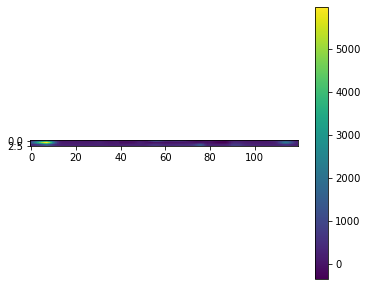

In [5]:
#preview
plt.figure(figsize=(6,5))
plt.imshow(projection)
plt.colorbar()

## 3 .Thresholding

In [10]:
th_idx = np.where(projection>=665)

k = np.array((th_idx[0], th_idx[1]))

ROI = tuple(map(tuple, k.T))

print("total", len(ROI), " pixels available : \n")
print(ROI)

total 49  pixels available : 

((0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 114), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 111), (1, 112), (1, 113), (1, 114), (1, 115), (1, 116), (1, 117), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 73), (2, 74), (2, 75), (2, 76), (2, 77), (2, 90), (2, 91), (2, 92), (2, 93))


In [11]:
def pixel(a,b):
    return IMG[:,a, b]

[]

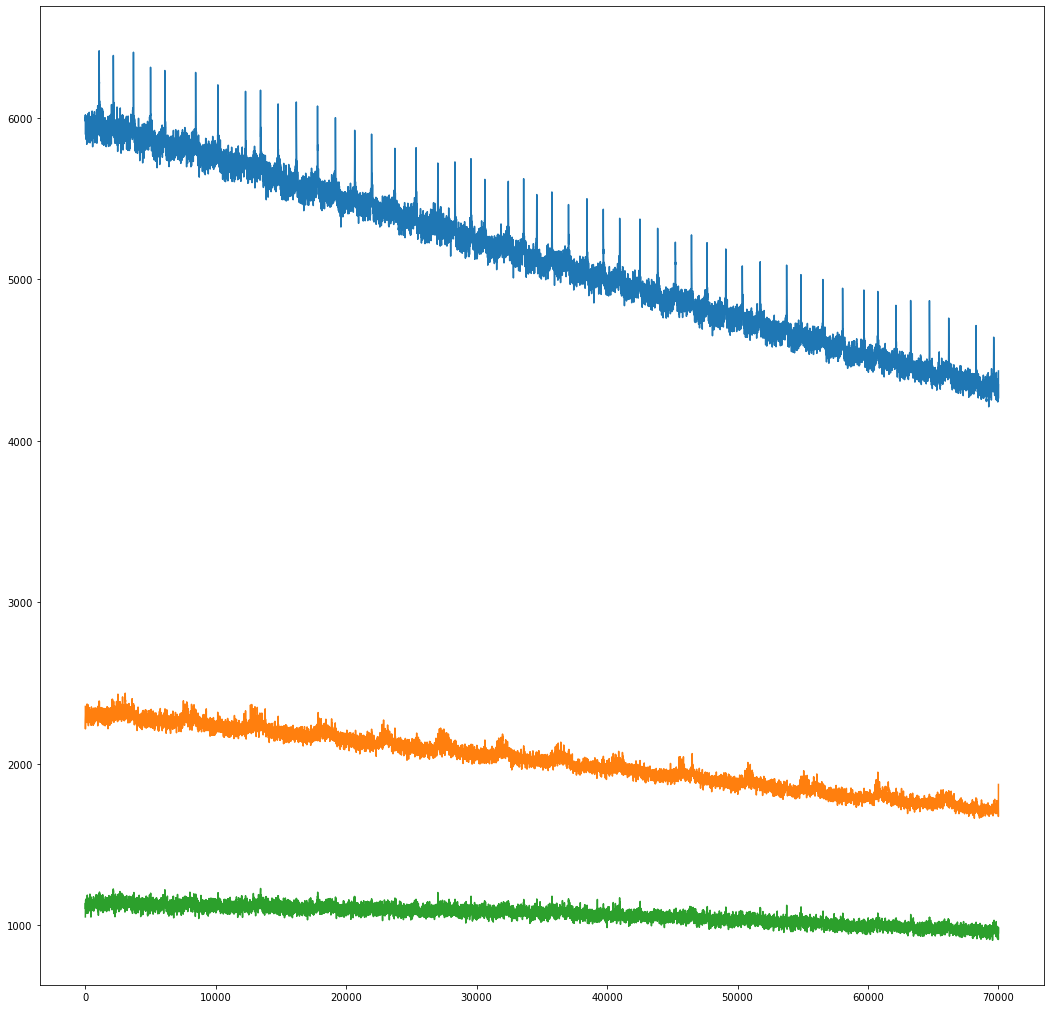

In [12]:
#single pixel preview
plt.figure(figsize=(18,18))
plt.plot(pixel(1,5))
plt.plot(pixel(1,115))
plt.plot(pixel(2,77))
plt.plot()

## 4. Baseline correction, Get dF/F0

In [18]:
def getDFF(pixel, Bin = 2000, crop = (5000,65000)):
    
    baseline = np.zeros(crop[1]-crop[0])
    
    for i in range(crop[0], crop[1]):
        
        window = pixel[i-Bin:i+Bin]
        base = np.quantile(window, 0.47)
        baseline[i-5000] = base
    
    F0 = np.median(baseline)
    DFF = (pixel[crop[0]:crop[1]] - baseline) / F0
    return DFF

# return dF/F0 by accepting certain pixel z profile as input
# Bin = interpolation window + -
# crop = cropped first, last 5000 frames to avoid fluctuation

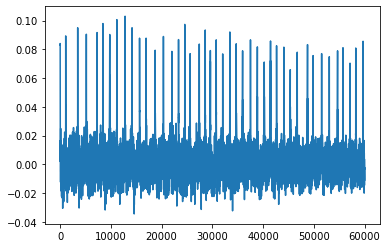

In [77]:
#function getDFF preview

plt.plot(getDFF(pixel(1,5)))

### apply function to pixels above threshold

In [78]:
Dff = np.zeros((60000,3,120))

print("will be saved as : " + main_path + "/" + newfilename)

for cor in range(360):
    twocor = divmod(cor, 120)
    
    if cor % 30 == 0:
        print((cor/360)*100, " % ")
        
    if twocor in ROI:
        print("processing", twocor)
    
        column = getDFF(pixel(twocor[0], twocor[1]))
        Dff[:,twocor[0], twocor[1]] = column
        
    
    else:
        column = np.zeros((60000))
        Dff[:,twocor[0], twocor[1]] = column
        
print("saving...")

tiff.imsave(main_path + "/" + newfilename, Dff)

print("done!")

will be saved as : STA_0701/Dff.csv
0.0  % 
8.333333333333332  % 
processing (0, 53)
processing (0, 54)
processing (0, 55)
processing (0, 56)
processing (0, 57)
processing (0, 58)
processing (0, 59)
16.666666666666664  % 
processing (0, 60)
processing (0, 63)
processing (0, 64)
processing (0, 65)
processing (0, 66)
processing (0, 67)
processing (0, 68)
25.0  % 
processing (0, 114)
33.33333333333333  % 
processing (1, 0)
processing (1, 1)
processing (1, 2)
processing (1, 3)
processing (1, 4)
processing (1, 5)
processing (1, 6)
processing (1, 7)
processing (1, 8)
processing (1, 9)
processing (1, 10)
processing (1, 11)
41.66666666666667  % 
50.0  % 
58.333333333333336  % 
processing (1, 111)
processing (1, 112)
processing (1, 113)
processing (1, 114)
processing (1, 115)
processing (1, 116)
processing (1, 117)
66.66666666666666  % 
processing (2, 4)
processing (2, 5)
processing (2, 6)
processing (2, 7)
processing (2, 8)
processing (2, 9)
75.0  % 
83.33333333333334  % 
processing (2, 73)
pr

### run if analyzing with saved file

In [50]:
#**run if analyzing with saved file**

import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff



#input here

main_path = "STA_0701"
filepath = "0704_th.tiff"

#input here



Dff = tiff.imread(filepath)

projection = np.mean(Dff, axis = 0)

th_idx = np.where(projection != 0)

k = np.array((th_idx[0], th_idx[1]))

ROI = tuple(map(tuple, k.T))

print("total", len(ROI), " pixels available : \n")
print(ROI)

total 49  pixels available : 

((0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 114), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 111), (1, 112), (1, 113), (1, 114), (1, 115), (1, 116), (1, 117), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 73), (2, 74), (2, 75), (2, 76), (2, 77), (2, 90), (2, 91), (2, 92), (2, 93))


# STA

In [47]:
def Find(curve, th, d_w = 600):
    spikelist = []
    for i in range(600,len(curve)-10000):
        if all(curve[i] >= curve[i-d_w:i+d_w]) == True:
            if curve[i] > th:
                spikelist.append(i)
    return spikelist

def window(curve, k, R):
    window = curve[k-R:k+R]
    return window

def STA(coordinate, plot, Normalize): # tuple coordinate, True/False, True/False
    

    R = window_size

    C = Dff[:,coordinate[0], coordinate[1]]

    peaks = np.zeros((2 * R, len(spikelist)))

    for idx in range(len(spikelist)):

        peaks[:, idx] = window(C, spikelist[idx], R)

    sta = np.mean(peaks, axis = 1)
    
    if Normalize == True:
        
        sta = sta / np.max(sta)
    
    if plot == True:
        plt.plot(sta, label = "ROI" + str(coordinate))
    
    return sta

def whereis(coordinate):
    if coordinate[0]==0:
        if coordinate[1]<40: return 7
        elif coordinate[1]>=40 and coordinate[1]<80: return 8
        else: return 9
    elif coordinate[0]==1:
        if coordinate[1]<40: return 4
        elif coordinate[1]>=40 and coordinate[1]<80: return 5
        else: return 6
    elif coordinate[0]==2:
        if coordinate[1]<40: return 1
        elif coordinate[1]>=40 and coordinate[1]<80: return 2
        else: return 3
    

def staplot(coorlist):
    plt.figure(figsize=(10,6))
    for coor in coorlist:
        STA(coor, True, False)
    plt.style.use("default")
    plt.ylabel("dF/F0")
    plt.title("standard timepoint = " + str(whereis(std)))
    plt.legend()

## 1. set roi to be standard(starting) pick

In [43]:
###input###

std = (0,114)      # select standard (starting) single pixel ROI

threshold = 0.04   # set dF/F0 value to assign as a pick

window_size = 200   # set window size

###input###

STD = Dff[:,std[0], std[1]]

print("channel " + str(whereis(std)))

channel 9


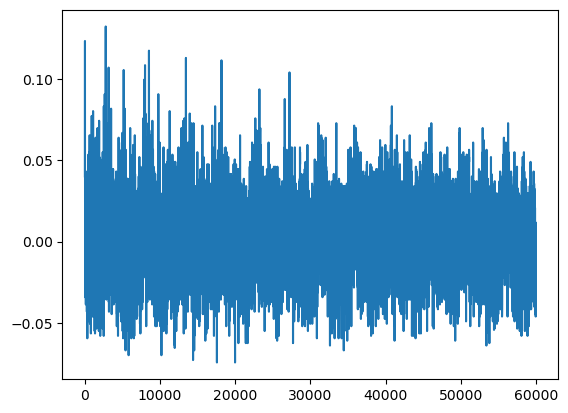

In [51]:
#preview#

plt.plot(STD);

In [45]:
spikelist = Find(STD, threshold)
num_spike = len(spikelist)

print("total " + str(num_spike) + " spikes in ROI")

total 43 spikes in ROI


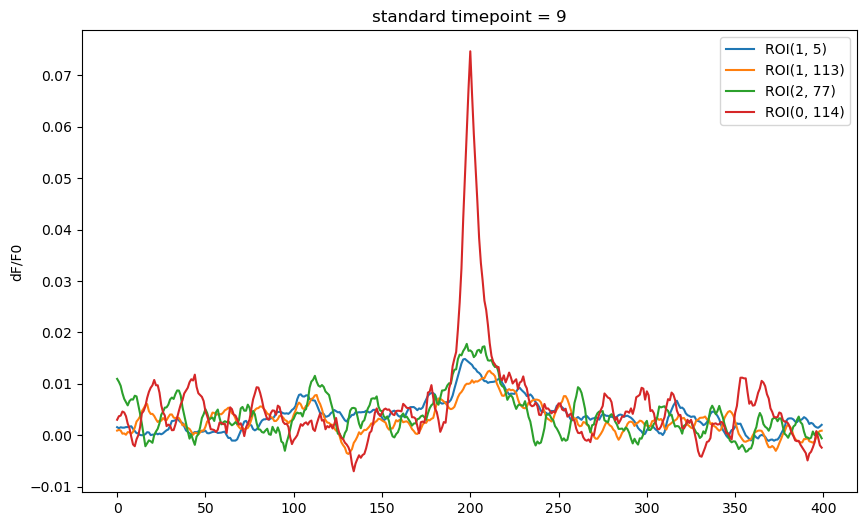

In [49]:
# view plot
coorlist = [(1,5),(1,113),(2,77),(0,114)]
staplot(coorlist)

## saving timemap

In [52]:
timemap = np.zeros((3,120))

for k in range (360):
    
    cor = divmod(k, 120)
    delay = np.argmax(STA(cor,False,False))
    timemap[cor[0], cor[1]] = delay
    
tiff.imsave(main_path + "/timemap.tiff", timemap)    

## saving decaymap

In [54]:
decaymap = np.zeros((3,120))

for k in range (360):
    

    cor = divmod(k, 120)
    decay = np.max(STA(cor,False,False))
    decaymap[cor[0], cor[1]] = decay
    
tiff.imsave(main_path + "/decaymap.tiff", decaymap)    

## saving corrmap

In [56]:
corrmap = np.zeros((3,120))

for k in range (360):
    
    cor = divmod(k, 120)
    corr = np.corrcoef((STA((1,113),False,False)),(STA(cor,False,False)))[0,1]
    corrmap[cor[0], cor[1]] = corr
    
tiff.imsave(main_path + "/correlationmap.tiff", corrmap)    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


## corrmap stack for whole pixels

In [58]:
corrmap = np.zeros((len(ROI),3,120))

for idx in range(len(ROI)):
    
    std = ROI[idx]
    
    
    STD = Dff[:,std[0], std[1]]
    
    
    spikelist = Find(STD, threshold)
    
    num_spike = len(spikelist)
    

    for k in range (360):
    
        cor = divmod(k, 120)
        
        corr = np.corrcoef((STA(std, False, False)),(STA(cor,False, False)))[0,1]
                    
        corrmap[idx, cor[0], cor[1]] = corr    
    
tiff.imsave(main_path + "/correlationmap_whole.tiff", corrmap)    